A famous early application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by Bortkiewicz in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths.

Plot the resulting probability distribution. Careful with the normalization.

How does it look like? Again try to fit it by hand.

In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import poisson
import iminuit
from iminuit import Minuit
from iminuit import cost
from iminuit.cost import LeastSquares

In [22]:
# Data
deaths = np.array([0, 1, 2, 3, 4])    # Numbers of deaths per groups
groups = np.array([109, 65, 22, 3, 1]) # Numebers of groups

total_corps = np.sum(groups)

# Check: number of total death must be 122
#total_deaths = np.sum(deaths * groups)
#print(total_deaths)

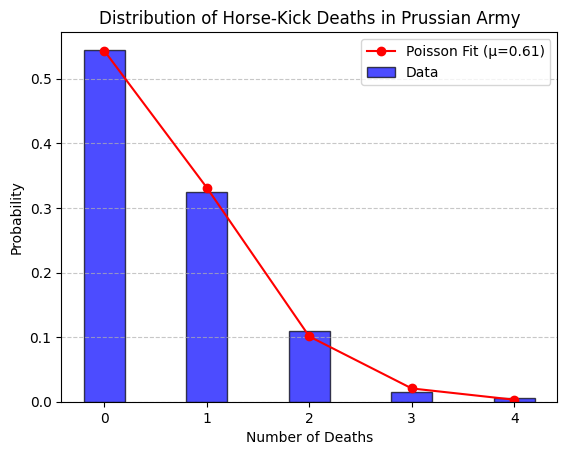

In [23]:
# Probability
prob = groups / total_corps

# Estimate the mean of the distribution
mean = np.sum(deaths * prob)
# Poisson distribution
x = np.arange(0, 5) # set the value on x axis
fit_values = poisson.pmf(x, mean)

# Plot
plt.bar(deaths, prob, width=0.4, label="Data", alpha=0.7, color='blue', edgecolor='black')
plt.plot(x, fit_values, color='red', marker='o', linestyle='-', label=f"Poisson Fit (μ={mean:.2f})")
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title("Distribution of Horse-Kick Deaths in Prussian Army")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7083 (χ²/ndof = 0.2)     │              Nfcn = 23               │
│ EDM = 6.36e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

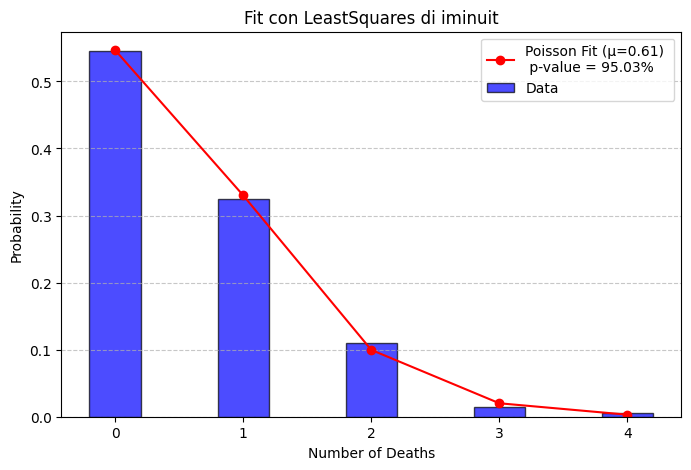

In [ ]:
# Fit with iminuit for the probability distribution

def model(x, mean):
    return total_corps * poisson.pmf(x, mean)

# Cost function
least_squares = LeastSquares(deaths, groups, np.sqrt(groups), model)

# Minuit initialization
m = Minuit(least_squares, mean=1.0)
m.migrad()  # Minimize
m.hesse()   # Error computing
print(m)

# Ricalcoliamo la distribuzione di Poisson con il fit LeastSquares
fit_values = poisson.pmf(x, m.values["mean"])

chi2_ = m.fval
dof = m.ndof
p_value = (1 - stats.chi2.cdf(chi2_, dof)) * 100

# Plot con il fit LeastSquares
plt.figure(figsize=(8, 5))
plt.bar(deaths, prob, width=0.4, label="Data", alpha=0.7, color='blue', edgecolor='black')
plt.plot(x, fit_values, color='red', marker='o', linestyle='-', label=f"Poisson Fit (μ={mean:.2f}) \n p-value = {p_value:.2f}%")
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title("Fit con LeastSquares di iminuit")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()